### Importação dos dados



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
import pandas as pd

loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

dados = pd.concat([loja, loja2, loja3, loja4])

faturamento_por_loja = dados.groupby('Loja')['Preço'].sum()
print(faturamento_por_loja)

faturamento_total = dados['Preço'].sum()
print(f"Faturamento Total: {faturamento_total}")

faturamento_medio_por_loja = dados.groupby('Loja')['Preço'].mean()
print(faturamento_medio_por_loja)

Loja
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Preço, dtype: float64
Faturamento Total: 5871490.790000001
Loja
Loja 1    650.491361
Loja 2    630.970352
Loja 3    620.612560
Loja 4    587.149101
Name: Preço, dtype: float64


# 2. Vendas por Categoria


Total de vendas por categoria:
 Categoria do Produto
brinquedos                 98140.86
eletrodomesticos         1766337.03
eletronicos              2214099.72
esporte e lazer           190635.39
instrumentos musicais     465029.67
livros                     50260.74
moveis                   1010214.00
utilidades domesticas      76773.38
Name: Preço, dtype: float64

Quantidade de produtos vendidos por categoria:
 Categoria do Produto
brinquedos               1290
eletrodomesticos         1149
eletronicos              1772
esporte e lazer          1113
instrumentos musicais     753
livros                    742
moveis                   1886
utilidades domesticas     730
Name: Produto, dtype: int64


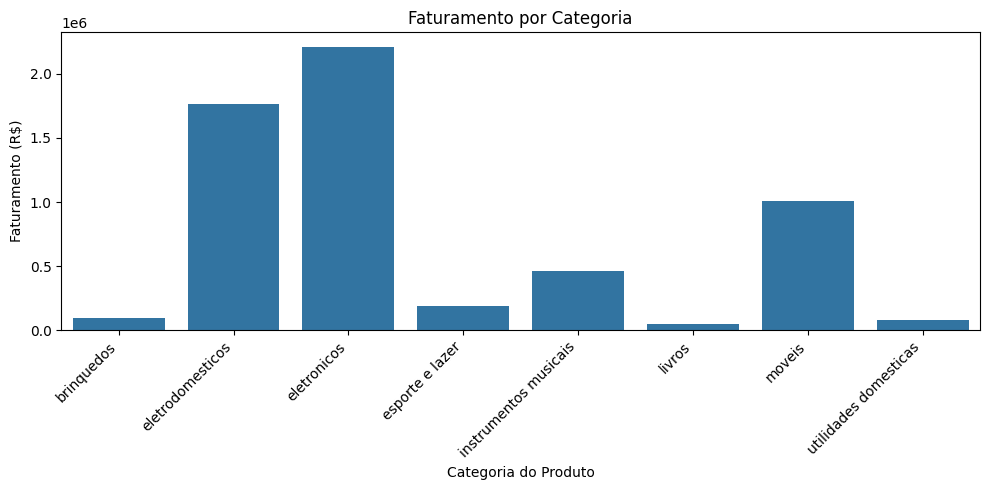

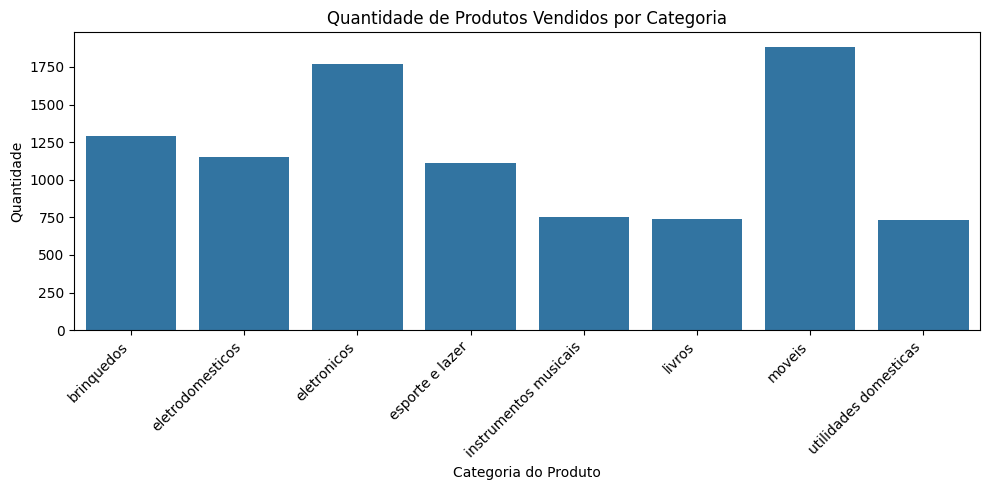

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


vendas_por_categoria = dados.groupby('Categoria do Produto')['Preço'].sum()


quantidade_por_categoria = dados.groupby('Categoria do Produto')['Produto'].count()


print("Total de vendas por categoria:\n", vendas_por_categoria)
print("\nQuantidade de produtos vendidos por categoria:\n", quantidade_por_categoria)


plt.figure(figsize=(10, 5))
sns.barplot(x=vendas_por_categoria.index, y=vendas_por_categoria.values)
plt.title('Faturamento por Categoria')
plt.xlabel('Categoria do Produto')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



plt.figure(figsize=(10, 5))
sns.barplot(x=quantidade_por_categoria.index, y=quantidade_por_categoria.values)
plt.title('Quantidade de Produtos Vendidos por Categoria')
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

Média de avaliação por loja:
 Loja
Loja 1    3.976685
Loja 2    4.037304
Loja 3    4.048326
Loja 4    3.995759
Name: Avaliação da compra, dtype: float64

Média geral de avaliação: 4.01


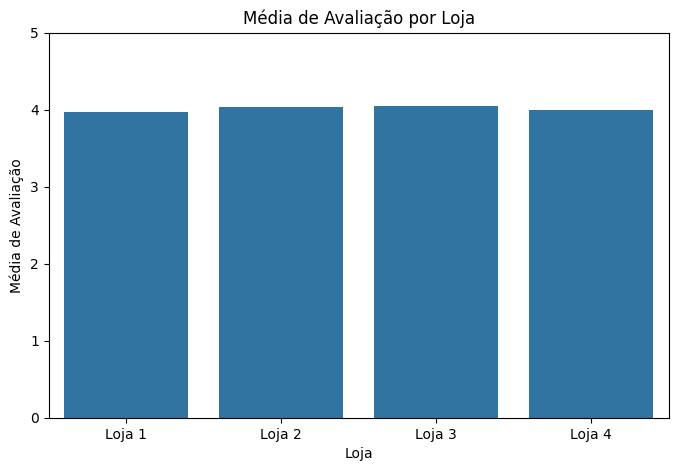

In [ ]:
import pandas as pd


media_avaliacao_por_loja = dados.groupby('Loja')['Avaliação da compra'].mean()

#
print("Média de avaliação por loja:\n", media_avaliacao_por_loja)


media_avaliacao_geral = dados['Avaliação da compra'].mean()


print(f"\nMédia geral de avaliação: {media_avaliacao_geral:.2f}")


import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 5))
sns.barplot(x=media_avaliacao_por_loja.index, y=media_avaliacao_por_loja.values)
plt.title('Média de Avaliação por Loja')
plt.xlabel('Loja')
plt.ylabel('Média de Avaliação')
plt.ylim(0, 5)
plt.show()

# 4. Produtos Mais e Menos Vendidos

Produto mais vendido (todas as lojas): Cômoda
Produto menos vendido (todas as lojas): Celular ABXY

Loja 1:
  Mais vendido: Guarda roupas
  Menos vendido: Celular ABXY

Loja 2:
  Mais vendido: Iniciando em programação
  Menos vendido: Jogo de tabuleiro

Loja 3:
  Mais vendido: Kit banquetas
  Menos vendido: Blocos de montar

Loja 4:
  Mais vendido: Cama box
  Menos vendido: Guitarra


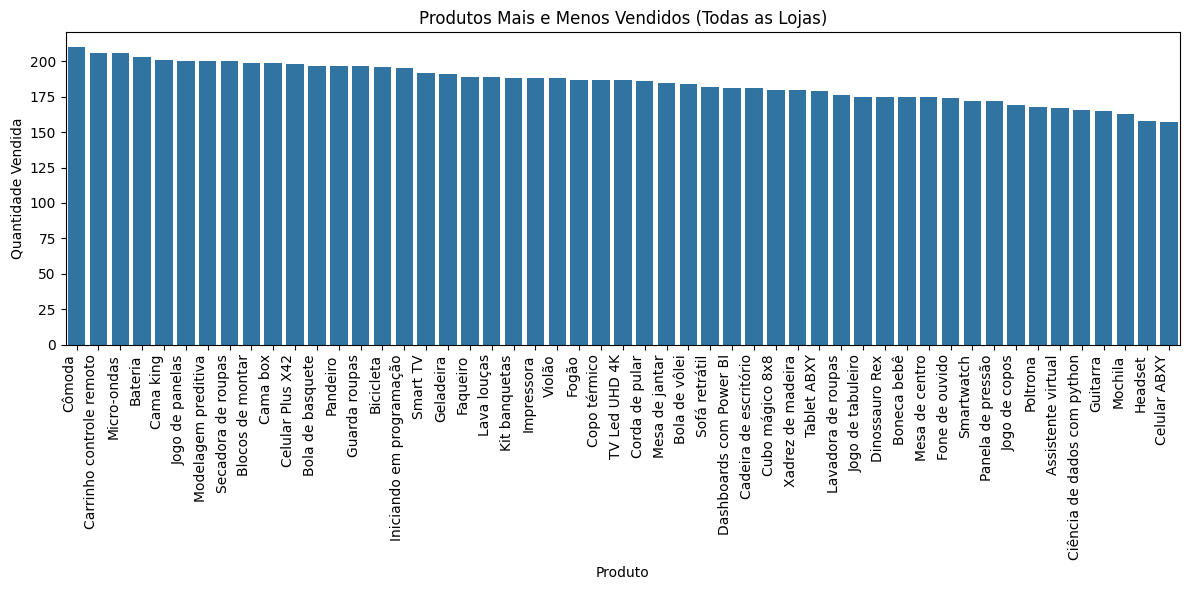

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


contagem_vendas_por_produto = dados.groupby('Produto')['Produto'].count()


mais_vendido = contagem_vendas_por_produto.idxmax()
menos_vendido = contagem_vendas_por_produto.idxmin()

print(f"Produto mais vendido (todas as lojas): {mais_vendido}")
print(f"Produto menos vendido (todas as lojas): {menos_vendido}")



for loja_nome in dados['Loja'].unique():
    loja_df = dados[dados['Loja'] == loja_nome]
    contagem_loja = loja_df.groupby('Produto')['Produto'].count()
    mais_vendido_loja = contagem_loja.idxmax()
    menos_vendido_loja = contagem_loja.idxmin()
    print(f"\n{loja_nome}:")
    print(f"  Mais vendido: {mais_vendido_loja}")
    print(f"  Menos vendido: {menos_vendido_loja}")




produtos_ordenados = contagem_vendas_por_produto.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=produtos_ordenados.index, y=produtos_ordenados.values)
plt.title('Produtos Mais e Menos Vendidos (Todas as Lojas)')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja


Frete médio por loja:
 Loja
Loja 1    34.691805
Loja 2    33.621941
Loja 3    33.074464
Loja 4    31.278997
Name: Frete, dtype: float64

Frete médio geral: 33.17


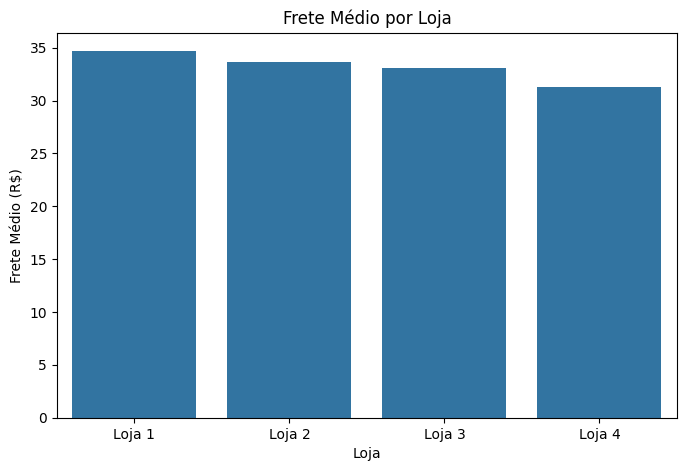

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



frete_medio_por_loja = dados.groupby('Loja')['Frete'].mean()


print("Frete médio por loja:\n", frete_medio_por_loja)


frete_medio_geral = dados['Frete'].mean()


print(f"\nFrete médio geral: {frete_medio_geral:.2f}")



plt.figure(figsize=(8, 5))
sns.barplot(x=frete_medio_por_loja.index, y=frete_medio_por_loja.values)
plt.title('Frete Médio por Loja')
plt.xlabel('Loja')
plt.ylabel('Frete Médio (R$)')
plt.show()

#Conclusão

Como demonstrado no estudo podemos chegar a conclusão que o Senhor João deveria vender a loja 4 devido ao seu desenho menor como pode ser visualizado pelos resultados e graficos desta analise.